In [21]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from collections import Counter

In [2]:
# Loading of data

data = pd.read_csv("tripadvisor_review.csv")
data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [3]:
'''Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) 
   and average rating is used against each category per user.
'''
# Descriptive statistics

data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [5]:
# Data size
data.info()
print("\n")
print("Data size is:", data.shape, "\n", "Data type is: ", "\n", data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


Data size is: (980, 11) 
 Data type is:  
 User ID         object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float

In [6]:
'''
Checking for missing data.
Zero Data is part of the data, as shown by the comments in the data description.
Box plots will be displayed to reveal outliers
After that, these outliers will be removed, then the following data visualization methods will be shown,
based on outlier free data: Correlation Matrix, Histogram, Density plot, Skew, Scatter matrix
'''
# Checking for missing data
data.isnull().sum()

User ID        0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

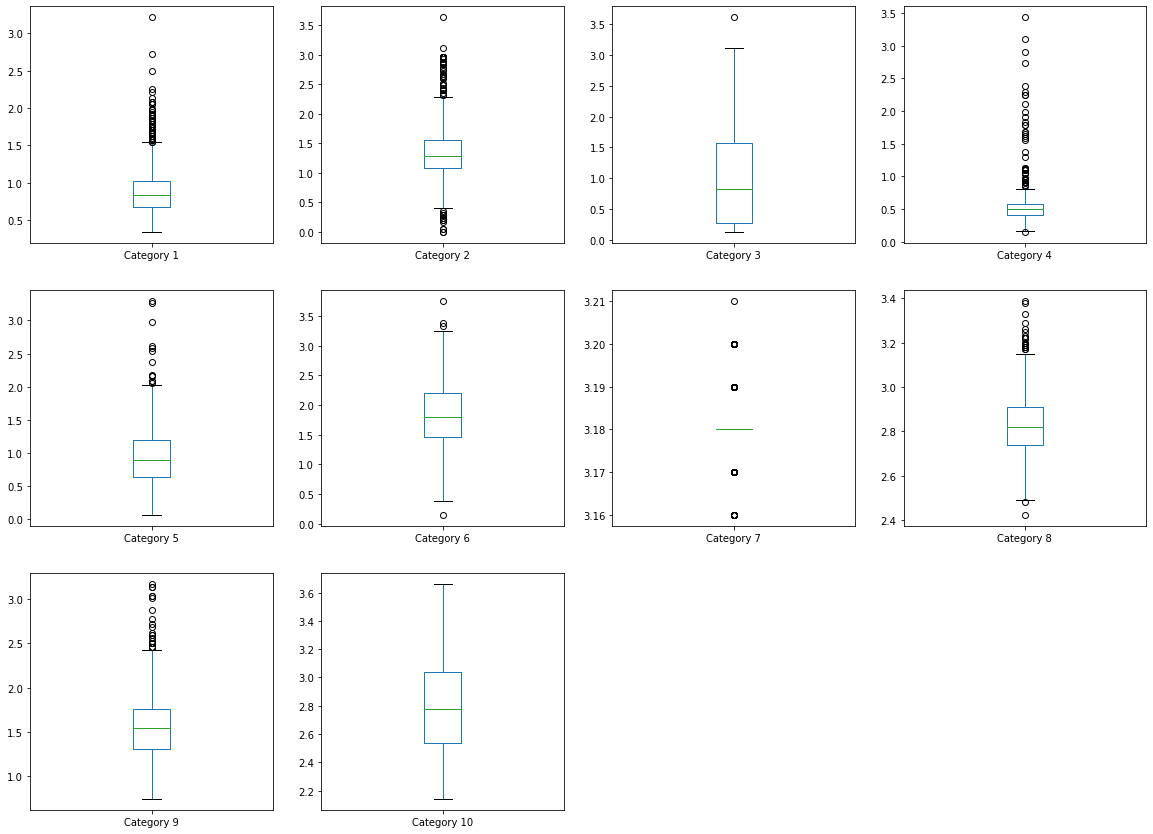

In [7]:
'''Data Visualizations'''

#Box plot
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, figsize = (20, 20))
plt.show()

In [8]:
'''
Data shows a number of outliers. 
Outliers in this dataset will be defined as values greater/less than 3 standard deviations from the mean.
The following code will count such observations.
'''

lower, upper = np.mean(data) - 3*np.std(data), np.mean(data) + 3*np.std(data)
mask = (data.drop(columns = "User ID") < lower) | (data.drop(columns = "User ID") > upper)
outlier = mask.sum(axis = 0)
print(outlier)

Category 1     17
Category 2     21
Category 3      1
Category 4     20
Category 5      7
Category 6      2
Category 7      1
Category 8      7
Category 9     10
Category 10     0
dtype: int64


In [9]:
#'''Removal of outliers'''
data[mask] = np.nan
data.dropna(inplace = True)
data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,900.00000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.87300,1.316044,1.027433,0.498689,0.922000,1.831767,3.180911,2.833800,1.552122,2.803422
std,0.28125,0.404957,0.786580,0.140036,0.399966,0.528134,0.007811,0.130946,0.336284,0.319471
min,0.34000,0.000000,0.130000,0.170000,0.060000,0.380000,3.160000,2.480000,0.740000,2.260000
25%,0.67000,1.080000,0.290000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.83000,1.280000,0.870000,0.490000,0.880000,1.780000,3.180000,2.820000,1.500000,2.780000
75%,1.02000,1.520000,1.580000,0.570000,1.200000,2.180000,3.180000,2.910000,1.760000,3.040000
max,1.87000,2.760000,3.120000,1.300000,2.180000,3.380000,3.200000,3.230000,2.620000,3.660000


In [10]:
'''
Display description of data to show outlier removal
'''
data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,900.00000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.87300,1.316044,1.027433,0.498689,0.922000,1.831767,3.180911,2.833800,1.552122,2.803422
std,0.28125,0.404957,0.786580,0.140036,0.399966,0.528134,0.007811,0.130946,0.336284,0.319471
min,0.34000,0.000000,0.130000,0.170000,0.060000,0.380000,3.160000,2.480000,0.740000,2.260000
25%,0.67000,1.080000,0.290000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.83000,1.280000,0.870000,0.490000,0.880000,1.780000,3.180000,2.820000,1.500000,2.780000
75%,1.02000,1.520000,1.580000,0.570000,1.200000,2.180000,3.180000,2.910000,1.760000,3.040000
max,1.87000,2.760000,3.120000,1.300000,2.180000,3.380000,3.200000,3.230000,2.620000,3.660000


In [11]:
'''
Data Visualizations
'''
# Correlation matrix

correlations = data.corr(method = 'pearson')
correlations

# Cat 5 and 6 have above average correlation (0.58)
# Cat 7 and cat 3, 10 have above average correlation (0.75, -0.71)

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
Category 1,1.000000,-0.203714,0.019264,0.031506,-0.079332,0.101675,-0.023726,0.029434,-0.030241,0.065009
Category 2,-0.203714,1.000000,0.062608,-0.000296,0.139896,0.138225,0.119576,-0.160382,0.063659,-0.070633
Category 3,0.019264,0.062608,1.000000,0.205320,0.326714,0.353734,0.755052,-0.162256,-0.075848,-0.470151
Category 4,0.031506,-0.000296,0.205320,1.000000,0.145688,0.361058,0.407246,0.000569,0.092705,-0.533703
Category 5,-0.079332,0.139896,0.326714,0.145688,1.000000,0.596323,0.270148,-0.002176,0.053344,-0.260657
Category 6,0.101675,0.138225,0.353734,0.361058,0.596323,1.000000,0.429973,0.026133,0.131014,-0.447165
Category 7,-0.023726,0.119576,0.755052,0.407246,0.270148,0.429973,1.000000,-0.042212,0.113217,-0.726572
Category 8,0.029434,-0.160382,-0.162256,0.000569,-0.002176,0.026133,-0.042212,1.000000,0.173568,0.093405
Category 9,-0.030241,0.063659,-0.075848,0.092705,0.053344,0.131014,0.113217,0.173568,1.000000,-0.077562
Category 10,0.065009,-0.070633,-0.470151,-0.533703,-0.260657,-0.447165,-0.726572,0.093405,-0.077562,1.000000


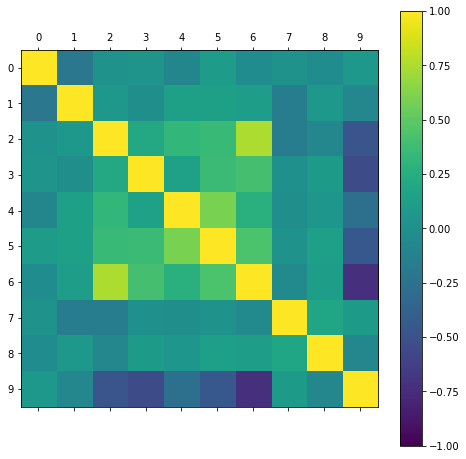

In [12]:
# plot correlation matrix
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

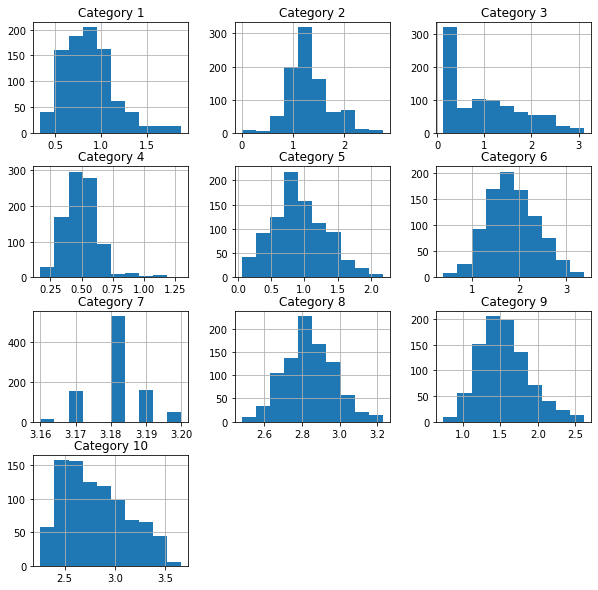

In [13]:
# Histogram

data.hist(figsize = (10, 10))
plt.show()

# How does a Gaussian distribution affect clustering?
# Have to normalize/standardize
# data.hist(column = ["Category 3", "Category 4", "Category 7"]) features to pay close eye to

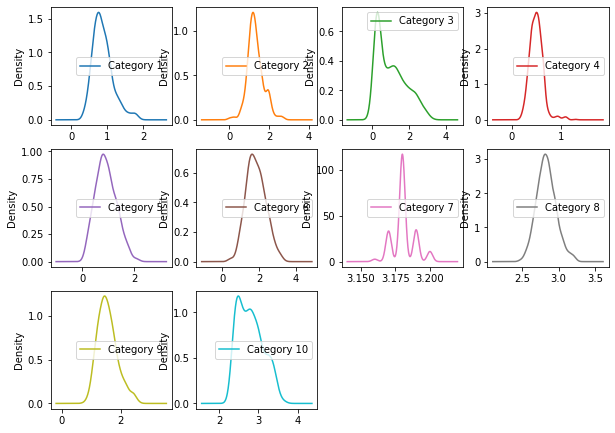

In [14]:
# Density plot

data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize = (10, 10))
plt.show()

In [15]:
#Attribute skew

data.skew()

# What do these skew values represent?
# Does a feature skew affect clustering?
    # Ans Data has to to have a symmetric distribution, no skew

Category 1     0.953425
Category 2     0.458210
Category 3     0.667650
Category 4     1.154586
Category 5     0.337809
Category 6     0.204859
Category 7     0.372823
Category 8     0.297548
Category 9     0.603750
Category 10    0.427020
dtype: float64

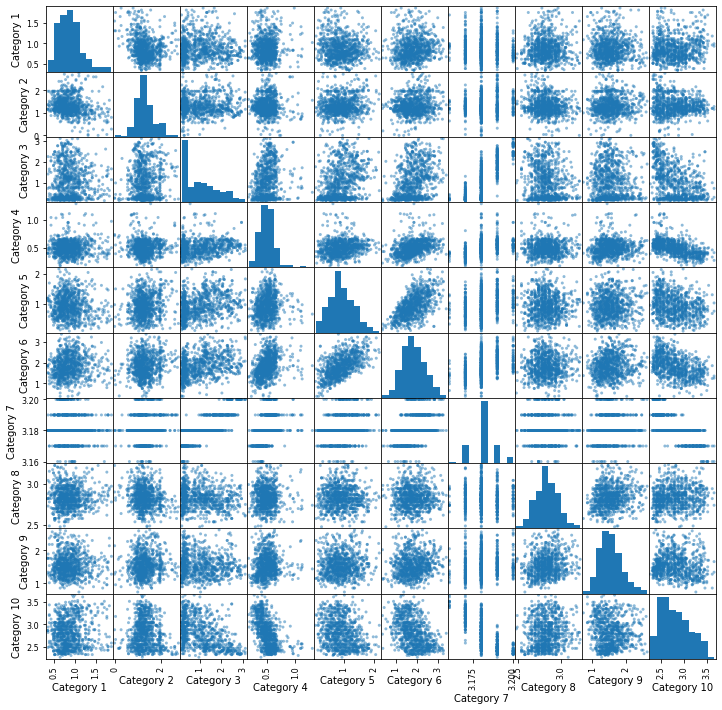

In [16]:
#Scatter matrix

scatter_matrix(data, figsize = (12, 12))
plt.show()

#Attribute 7 has something interesting going on

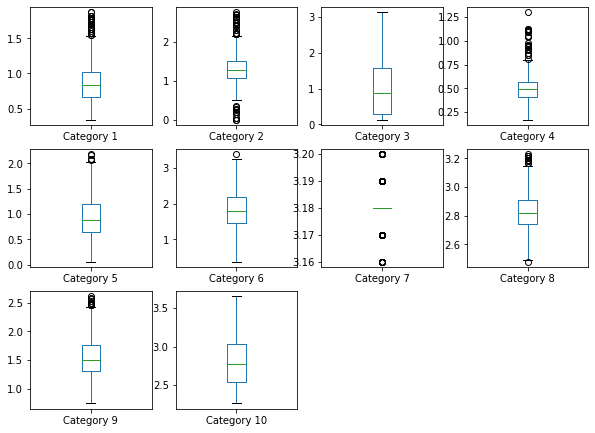

'\nAfter doing box plot again, the data still shows outliers. \nThis could be because the descriptive statistics is applied to this new data, independent of previous data entries.\nSubsequent iterations prove the case\n'

In [17]:
#Box plot
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, figsize = (10, 10))
plt.show()

'''
After doing box plot again, the data still shows outliers. 
This could be because the descriptive statistics is applied to this new data, independent of previous data entries.
Subsequent iterations prove the case
'''

In [18]:
#Phase 3
data = data.drop(columns = 'User ID')

In [19]:
data.head(5)

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
5,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66


In [20]:
data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,900.00000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.87300,1.316044,1.027433,0.498689,0.922000,1.831767,3.180911,2.833800,1.552122,2.803422
std,0.28125,0.404957,0.786580,0.140036,0.399966,0.528134,0.007811,0.130946,0.336284,0.319471
min,0.34000,0.000000,0.130000,0.170000,0.060000,0.380000,3.160000,2.480000,0.740000,2.260000
25%,0.67000,1.080000,0.290000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.83000,1.280000,0.870000,0.490000,0.880000,1.780000,3.180000,2.820000,1.500000,2.780000
75%,1.02000,1.520000,1.580000,0.570000,1.200000,2.180000,3.180000,2.910000,1.760000,3.040000
max,1.87000,2.760000,3.120000,1.300000,2.180000,3.380000,3.200000,3.230000,2.620000,3.660000


In [51]:
'''So the problem is an unsupervised elarning problem. A clustering task
How do i select a performance measure for clustering
Looking for a performance matric: I will try elbow method, and the silouette score.

Feature Selection/Reduction: Looking at the data, and the problem being addressed, 
all the features would be kept. This is because the model will create a cluster of groups,
based on similarity measure. Attributes with near zero correlation with other attributes 
may likely be in its own cluster, dependednt on the number of predefined clusters.
Suhc attributes would be described as having no relationshp with other attributes,
and hence users who give high reviews to such attributes are less likely to give similar
ratings to the other non corrrelated atttributes. If attributes also have very low correlation, 
it may mean that the data has no cluster structure. 

Data Transformation: Clustering performance improves when all the data has been transformed 
to the same scale. For this step, I will be doing both standardization and a power transformation independently, to compare
performances of the two. Box-cox will not work here, because the data must be strictly positive. 
Hence another power transform will be used here.
Standardization is employed here because the initial; data has attributes with dissimilar variances. Such a condition 
will affect the weights given to some attributes in the clustering process. In this situation leaving variances unequal is 
equivalent to putting more weight on variables with smaller variance, "so clusters will tend to be separated along variables 
with greater variance."
Standardization does not affect correlation. 
'''

#Dimensionality reduction using PCA
pca = PCA(n_components=2)
data1 = pca.fit_transform(data)
print(pca.explained_variance_ratio_)

[0.48065665 0.18129938]


In [23]:
N, YJ, S = data1, data1, data1
#Normalized, Jeo-Johnson and Standardized respectively

In [24]:
#Normalized dataset
scaler = MinMaxScaler(feature_range = (0, 1))
rescaled_N = scaler.fit_transform(N)
rescale_N = pd.DataFrame(rescaled_N, columns = ['Component 1', 'Component 2'])
rescale_N.describe()

,Component 1,Component 2
count,900.000000,900.000000
mean,0.383838,0.455086
std,0.204119,0.162904
min,0.000000,0.000000
25%,0.213604,0.343122
50%,0.331562,0.454680
75%,0.545662,0.564265
max,1.000000,1.000000


In [25]:
#Standardized dataset
scaler2 = StandardScaler().fit(S)
rescaled_S = scaler2.transform(S)
rescale_S = pd.DataFrame(rescaled_S, columns  = ['Component 1', 'Component 2'])
rescale_S.describe()

,Component 1,Component 2
count,9.000000e+02,9.000000e+02
mean,-2.405483e-17,-9.868649e-18
std,1.000556e+00,1.000556e+00
min,-1.881514e+00,-2.795146e+00
25%,-8.344607e-01,-6.876856e-01
50%,-2.562512e-01,-2.493083e-03
75%,7.932346e-01,6.705783e-01
max,3.020324e+00,3.346868e+00


In [26]:
#Power Transformation dataset
scaler3 = PowerTransformer(method = 'yeo-johnson')
rescaled_YJ = scaler3.fit_transform(YJ)
rescale_YJ = pd.DataFrame(rescaled_YJ, columns = ['Component 1', 'Component 2'])
rescale_YJ.describe()

,Component 1,Component 2
count,9.000000e+02,9.000000e+02
mean,1.244683e-16,1.270589e-17
std,1.000556e+00,1.000556e+00
min,-2.428674e+00,-2.836112e+00
25%,-8.352838e-01,-6.845115e-01
50%,-1.127111e-01,4.392812e-03
75%,8.743474e-01,6.741012e-01
max,2.298960e+00,3.290689e+00


In [27]:
#Train/Test split
X_train_S, X_validation_S = train_test_split(rescale_S, test_size=0.20, random_state=1, shuffle=True)
X_train_YJ, X_validation_YJ = train_test_split(rescale_YJ, test_size=0.20, random_state=1, shuffle=True)
X_train_N, X_validation_N = train_test_split(rescale_N, test_size=0.20, random_state=1, shuffle=True)

In [28]:
#Model Building
'''
Partitionaing clustering requires to specify the number of clusters in the dataset. 
THere are various methods to determine the optimal number k, such as the Elbow method, Dunn, and Silhoette analysis
I will be making this analysis using both the elbow method and the silhouette method.
From the elbow analysis, it is not clear as two what optimal k to choose, hence the silhouette scorew is used.
The silouette score measures how sililar a point is to its own cluster, as compares to other clusters. THe range of 
the score is between -1 and +1. SCores closer to 1 indicate that the sample is placed in its correct cluster. The best
valaue is 1, and worst is -1. Scores close to 0 indicate overlapping clusters. From the graph, it can be inferred that 
the dataset has overlapping clusters, with the best score being for k = 2. Hence the most optimal k for this data is k=2. 
Ifirst divide the dataset into train test split. At this ppoint there are two datasets, the data transformations in both 
yeo-johnson and standardization. The scores from the silhouette score, for the optimal k, 
will show which data transformation contributes to better clsutering'''

'\nPartitionaing clustering requires to specify the number of clusters in the dataset. \nTHere are various methods to determine the optimal number k, such as the Elbow method, Dunn, and Silhoette analysis\nI will be making this analysis using both the elbow method and the silhouette method.\nFrom the elbow analysis, it is not clear as two what optimal k to choose, hence the silhouette scorew is used.\nThe silouette score measures how sililar a point is to its own cluster, as compares to other clusters. THe range of \nthe score is between -1 and +1. SCores closer to 1 indicate that the sample is placed in its correct cluster. The best\nvalaue is 1, and worst is -1. Scores close to 0 indicate overlapping clusters. From the graph, it can be inferred that \nthe dataset has overlapping clusters, with the best score being for k = 2. Hence the most optimal k for this data is k=2. \nIfirst divide the dataset into train test split. At this ppoint there are two datasets, the data transformations

C:\Users\rakinie\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rakinie\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rakinie\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


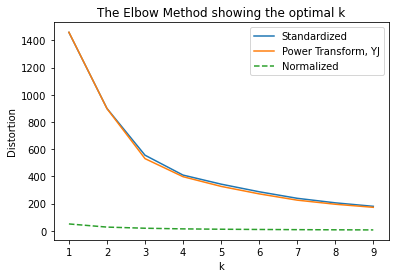

In [31]:
#Section for Elbow method

distortion = []
distortion2 = []
distortion3 = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel2 = KMeans(n_clusters=k)
    kmeanModel3 = KMeans(n_clusters=k)
    kmeanModel.fit(X_train_S), kmeanModel2.fit(X_train_YJ), kmeanModel3.fit(X_train_N)
    distortion.append(kmeanModel.inertia_)
    distortion2.append(kmeanModel2.inertia_)
    distortion3.append(kmeanModel3.inertia_)

plt.figure()
plt.plot(K, distortion, label = 'Standardized')
plt.plot(K, distortion2, '-', label = 'Power Transform, YJ')
plt.plot(K, distortion3, '--', label = 'Normalized')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.legend()
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [58]:
print(distortions, "\n", distortions2, "\n", distortions3)

[0.3946971000503336, 0.40958520935809295, 0.3999553050259066, 0.35878815026945843, 0.4004600350300963, 0.3784944615002013, 0.3828665714270911, 0.3972640190674723] 
 [0.38569509934837626, 0.41637349436503207, 0.4054119131569668, 0.39273205972941133, 0.35883984645007433, 0.3859811179650106, 0.40116211543221386, 0.387964237149167] 
 [0.44052844481615017, 0.4019852233179413, 0.3828938531596845, 0.3936286183003566, 0.4094911355083769, 0.3782058464894239, 0.3803273069170288, 0.39141859662904677]


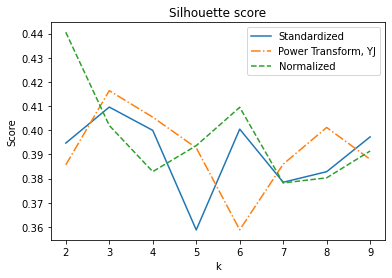

In [37]:
# determine k using silhouette method
# k means determine k
score = []
score2 = []
score3 = []
K = range(2,10)
for k in K:
    kmeans_S = KMeans(n_clusters=k, init='k-means++').fit(X_train_S)
    kmeans_YJ = KMeans(n_clusters=k, init='k-means++').fit(X_train_YJ)
    kmeans_N = KMeans(n_clusters=k, init='k-means++').fit(X_train_N)
    labels = kmeans_S.labels_
    labels2 = kmeans_YJ.labels_
    labels3 = kmeans_N.labels_
    score.append(metrics.silhouette_score(X_train_S, labels, metric = 'euclidean'))
    score2.append(metrics.silhouette_score(X_train_YJ, labels2, metric = 'euclidean'))
    score3.append(metrics.silhouette_score(X_train_N, labels3, metric = 'euclidean'))
# Plot the elbow
plt.plot(K, distortions, label = 'Standardized')
plt.plot(K, distortions2, '-.', label = 'Power Transform, YJ')
plt.plot(K, distortions3, '--', label = 'Normalized')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Silhouette score')
plt.legend()
plt.show()

In [39]:
#Calling Algorithm for optimal ks

kmeans_N = KMeans(n_clusters=2, init='k-means++').fit(X_train_N)
kmeans_YJ = KMeans(n_clusters=3, init='k-means++').fit(X_train_YJ)

In [40]:
kmeans_N.labels_

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [41]:
kmeans_YJ.labels_

array([1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 0,
       2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 2,
       1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1,
       2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1,
       0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1,
       0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0,
       2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0,
       1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 2, 2, 1,
       2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2,
       0, 2, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0,

In [43]:
kmeans_N.cluster_centers_

array([[0.59994058, 0.47710454],
       [0.23532361, 0.44562154]])

In [44]:
kmeans_YJ.cluster_centers_

array([[ 0.9311491 ,  0.98727642],
       [-0.97965688,  0.30348866],
       [ 0.3779811 , -1.00815098]])

In [45]:
kmeans_N.score(X_train_N)

-26.568518770051927

In [47]:
kmeans_YJ.score(X_train_YJ)

-529.9821923436995

In [49]:
Counter(kmeans_N.labels_)

Counter({1: 432, 0: 288})

In [50]:
Counter(kmeans_YJ.labels_)

Counter({1: 284, 0: 184, 2: 252})

In [52]:
metrics.silhouette_score(X_train_N, kmeans_N.labels_, metric = 'euclidean')

0.44052844481615017

In [53]:
metrics.silhouette_score(X_train_YJ, kmeans_YJ.labels_, metric = 'euclidean')

0.41637349436503207

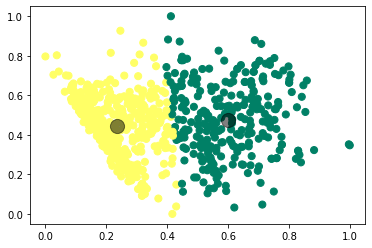

In [55]:
#Visualizing clusters
pred = kmeans_N.predict(X_train_N)
plt.scatter(X_train_N.iloc[:, 0], X_train_N.iloc[:, 1], c=pred, s=50, cmap='summer')

centers = kmeans_N.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

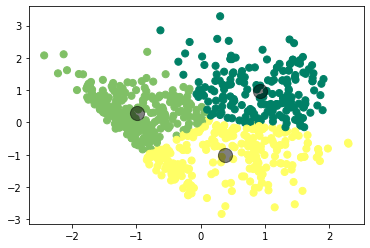

In [57]:
#Visualizing clusters
pred2 = kmeans_YJ.predict(X_train_YJ)
plt.scatter(X_train_YJ.iloc[:, 0], X_train_YJ.iloc[:, 1], c=pred2, s=50, cmap='summer')

centers = kmeans_YJ.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);